# **Goal**
## Based on the trend from 2010-2021, forecast the main musical feature for songs in 2023 Using linear regression.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [2]:
df = pd.read_csv('playlist_2010to2022.csv')
df.columns = [col.replace('_',' ') for col in df.columns]

df.isnull().sum()

playlist url         0
year                 0
track id             0
track name           0
track popularity     0
album                0
artist id            0
artist name          0
artist genres        0
artist popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration ms          1
time signature       1
dtype: int64

In [3]:
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

playlist url         0
year                 0
track id             0
track name           0
track popularity     0
album                0
artist id            0
artist name          0
artist genres        0
artist popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration ms          0
time signature       0
dtype: int64

In [4]:
df_cleaned.columns

Index(['playlist url', 'year', 'track id', 'track name', 'track popularity',
       'album', 'artist id', 'artist name', 'artist genres',
       'artist popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration ms', 'time signature'],
      dtype='object')

In [5]:
df_cleaned

,playlist url,year,track id,track name,track popularity,album,artist id,artist name,artist genres,artist popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration ms,time signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [6]:
# change duration ms to min
df_cleaned['duration ms'] = df_cleaned['duration ms'] / (1000*60)

# Compute the average of each musical feature by year
features_avg_by_year = df_cleaned.groupby('year').mean()

# Display the average values of the musical features
features_avg_by_year


C:\Users\AmnadunyPC\AppData\Local\Temp\ipykernel_15876\3427526689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['duration ms'] = df_cleaned['duration ms'] / (1000*60)


,track popularity,artist popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration ms,time signature
year,,,,,,,,,,,,,,,
2000,65.610000,62.990000,0.657990,0.754550,5.620000,-6.030310,0.560000,0.064415,0.121520,0.029694,0.160876,0.632183,121.899770,4.146817,4.000000
2001,67.830000,63.480000,0.671570,0.717210,4.970000,-5.982410,0.580000,0.097884,0.138772,0.027833,0.177294,0.643794,115.298340,4.040445,3.980000
2002,65.640000,66.390000,0.652380,0.728990,4.900000,-5.524740,0.610000,0.102417,0.128575,0.009488,0.172610,0.572225,119.797630,4.130478,3.980000
2003,64.220000,65.080000,0.665900,0.709230,5.570000,-5.672180,0.590000,0.121517,0.161063,0.035505,0.158095,0.608582,117.405450,4.064223,3.960000
2004,67.818182,66.080808,0.664212,0.707773,5.222222,-5.672525,0.626263,0.102889,0.168876,0.015777,0.173630,0.585981,118.758384,3.880900,3.929293
2005,69.190000,69.590000,0.665880,0.667660,5.420000,-6.068620,0.600000,0.109072,0.141495,0.015595,0.167048,0.538500,113.738720,3.938118,3.960000
2006,67.660000,67.970000,0.644810,0.708860,5.700000,-5.607490,0.630000,0.125435,0.120185,0.002162,0.198719,0.563770,117.267600,3.833015,3.980000
2007,69.320000,68.200000,0.651660,0.743270,4.790000,-5.350180,0.610000,0.096097,0.135608,0.012900,0.177097,0.581220,123.443400,3.988479,4.020000
2008,71.140000,70.290000,0.631730,0.724350,5.810000,-5.575100,0.570000,0.090401,0.137925,0.015643,0.182706,0.530248,125.598490,3.847741,3.990000


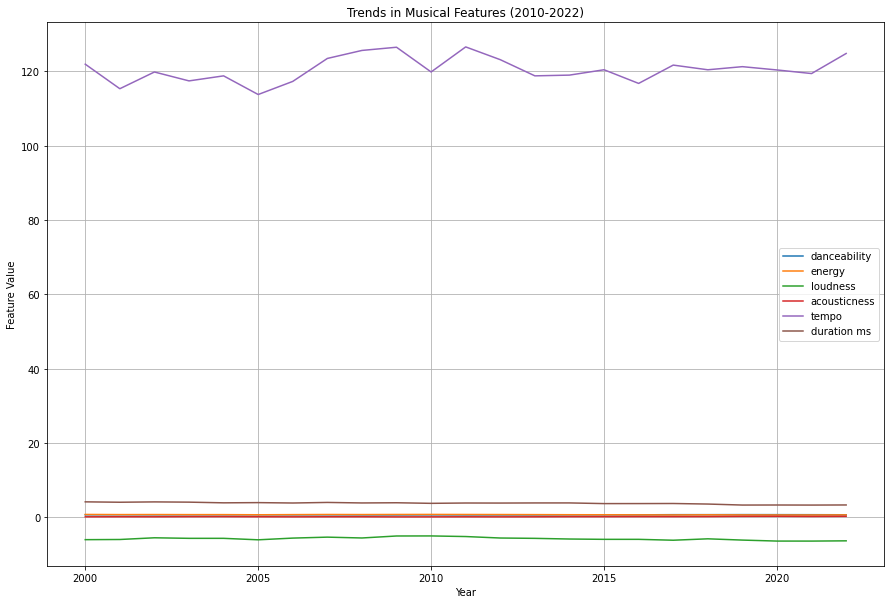

In [7]:
# List of features to visualize
features_to_plot = ['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'duration ms']

# Plotting the features
plt.figure(figsize=(15, 10))

for feature in features_to_plot:
    plt.plot(features_avg_by_year.index, features_avg_by_year[feature], label=feature)

plt.title("Trends in Musical Features (2010-2022)")
plt.xlabel("Year")
plt.ylabel("Feature Value")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Extracting years for modeling
years = features_avg_by_year.index.values.reshape(-1, 1)

# Function to predict a given feature's value for 2023 using linear regression
def predict_for_2023(feature):
    # Preparing the data
    feature_values = features_avg_by_year[feature].values.reshape(-1, 1)
    
    # Creating and fitting the linear regression model
    model = LinearRegression().fit(years, feature_values)
    
    # Predicting the feature value for 2023
    prediction_2023 = model.predict(np.array([[2023]]))
    
    return prediction_2023[0][0]

# Predicting for ['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'duration']
danceability_2023 = predict_for_2023('danceability')
energy_2023 = predict_for_2023('energy')
loudness_2023 = predict_for_2023('loudness')
accousticness_2023 = predict_for_2023('acousticness')
tempo_2023 = predict_for_2023('tempo')
duration_2023 = predict_for_2023('duration ms')

# Creating a DataFrame for the predictions
predictions_2023 = pd.DataFrame({
    'Feature': ['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'duration'],
    'Predicted Value for 2023': [danceability_2023, energy_2023, loudness_2023, accousticness_2023, tempo_2023, duration_2023]
})

predictions_2023

,Feature,Predicted Value for 2023
0,danceability,0.680419
1,energy,0.629488
2,loudness,-6.113061
3,acousticness,0.210755
4,tempo,121.936349
5,duration,3.336058


Based on the prediction, can be concluded :
- **Danceability (0.6804)**: Songs in 2023 are predicted to have a moderate to high danceability. This suggests that tracks will likely be suitable for dancing and may have a consistent beat or rhythm.

- **Energy (0.6295)**: The predicted energy level indicates that music in 2023 might have a moderate energy feel. This implies a balance between calm, mellow tracks and high-energy tracks.

- **Loudness (-6.1131 dB)**: With a predicted average loudness of around -6.11 dB, songs in 2023 might maintain a relatively consistent loudness level compared to the previous years. This is a standard loudness level for contemporary music.

- **Acousticness (0.2108)**: The predicted value suggests that songs in 2023 might lean towards being more electronic or produced, with some acoustic elements present but not dominant.

- **Tempo (121.94 BPM)**: The average tempo predicted suggests a moderate pace for songs in 2023, which aligns with many popular music genres like pop, rock, and hip-hop.

- **Duration (3.3361 minutes)**: Songs in 2023 are predicted to have an average duration of approximately 3.34 minutes. This is in line with the typical length of radio-friendly tracks and suggests a preference for relatively shorter, more concise musical expressions.

Songs in 2023 are anticipated to be moderately danceable and energetic, with a balanced tempo. They might lean more towards electronic production, with average track lengths suitable for radio play and streaming platforms. The trends suggest a continued preference for music that strikes a balance between energy and mellowness, making them versatile for various listening scenarios, from casual listening to dancing.

In [12]:
# Performance metrics to indicate the accuracy of the linear regression model

def performance_metrics(feature):
    # Preparing the data
    feature_values = features_avg_by_year[feature].values.reshape(-1, 1)
    
    # Creating and fitting the linear regression model
    model = LinearRegression().fit(years, feature_values)
    
    # Predicting the feature values for the training data
    predictions = model.predict(years)
    
    # Calculating metrics
    mae = mean_absolute_error(feature_values, predictions)
    mse = mean_squared_error(feature_values, predictions)
    rmse = mean_squared_error(feature_values, predictions, squared=False)
    r2 = r2_score(feature_values, predictions)
    
    return mae, mse, rmse, r2

# Storing metrics for each feature
metrics = {'Feature': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

features = ['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'duration ms']
for feature in features:
    mae, mse, rmse, r2 = performance_metrics(feature)
    metrics['Feature'].append(feature)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['R2'].append(r2)

# Creating a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)

metrics_df

,Feature,MAE,MSE,RMSE,R2
0,danceability,0.020998,0.000551,0.023481,0.185943
1,energy,0.025049,0.000920,0.030334,0.572964
2,loudness,0.268440,0.119351,0.345472,0.217055
3,acousticness,0.024480,0.000841,0.029003,0.505621
4,tempo,2.607991,10.399515,3.224828,0.056279
5,duration ms,0.089196,0.010846,0.104146,0.839702


- **Danceability**: <br>
    - The model, on average, is off by about 0.021 (MAE) in its predictions.
    - The R2 value of 0.186 suggests that the linear model explains about 18.6% of the variability in danceability. This isn't very high, indicating that a linear model might not be the best fit for predicting this feature.

- **Energy**: <br>
    - The model is more accurate in predicting energy, with an R2 value of 0.573, meaning it explains 57.3% of the variability in energy.

- **Loudness**: <br>
    - The average error (MAE) is 0.268, and the R2 is 0.217. The model explains 21.7% of the variability in loudness.

- **Acousticness**: <br>
    - The model for acousticness is relatively accurate with an R2 of 0.506, meaning it captures over half the variability in acousticness.

- **Tempo**: <br>
    - The predictions for tempo seem to be less accurate, with an R2 value of just 0.056. This indicates that only 5.6% of the variability in tempo is explained by the model.

- **Duration ms**: <br>
    - This feature has the highest R2 value, 0.840. This means the model explains a whopping 84% of the variability in song duration.

In summary :
- The models for **energy**, **acousticness**, and **duration ms** seem to perform relatively well.
- The models for **danceability**, **loudness**, and especially **tempo** have lower R2 values, suggesting they might not be the best predictors using a linear approach or based on the given data.